In [39]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [40]:
train_df = pd.read_csv("/Users/austin/Desktop/titanic/train.csv")
test_df = pd.read_csv("/Users/austin/Desktop/titanic/test.csv")
train_df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [41]:
# Preview training data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
# Preview testing data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Cleaning for training data

### Missing values

In [43]:
# Check missing values in training data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
print('Percentage of missing "Age" values is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Percentage of missing "Age" values is 19.87%


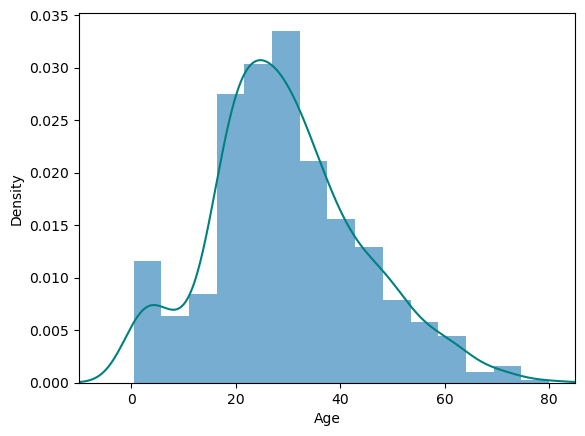

In [71]:
ax = train_df['Age'].hist(bins=15, density=True, stacked=True, alpha=0.6)
train_df['Age'].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Since 'Age' is right-skewed, using the mean might give us biased results by filling in ages that are older than desired.

To deal with this, we'll use the median to impute the missing value.

In [72]:
print('The mean of "Age" is %.2F' %(train_df['Age'].mean()))
print('The median of "Age" is %.2F' %(train_df['Age'].median()))

The mean of "Age" is 29.70
The median of "Age" is 28.00


In [73]:
print('Percentage of missing "Cabin" values is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percentage of missing "Cabin" values is 77.10%


77% of records are missing, which means imputing information and using this variable for prediction is probably not wise.

We'll ignore this variable.

In [74]:
print('Percentage of missing "Embarked" values is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percentage of missing "Embarked" values is 0.22%


There are only 0.22% missing values for "Embarked", so we can use mode to impute it.

In [75]:
print(train_df['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


### Adjustment to data

In [76]:
train_data = train_df.copy()
train_data['Age'].fillna(train_df['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [77]:
# Check missing values in adjusted training data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

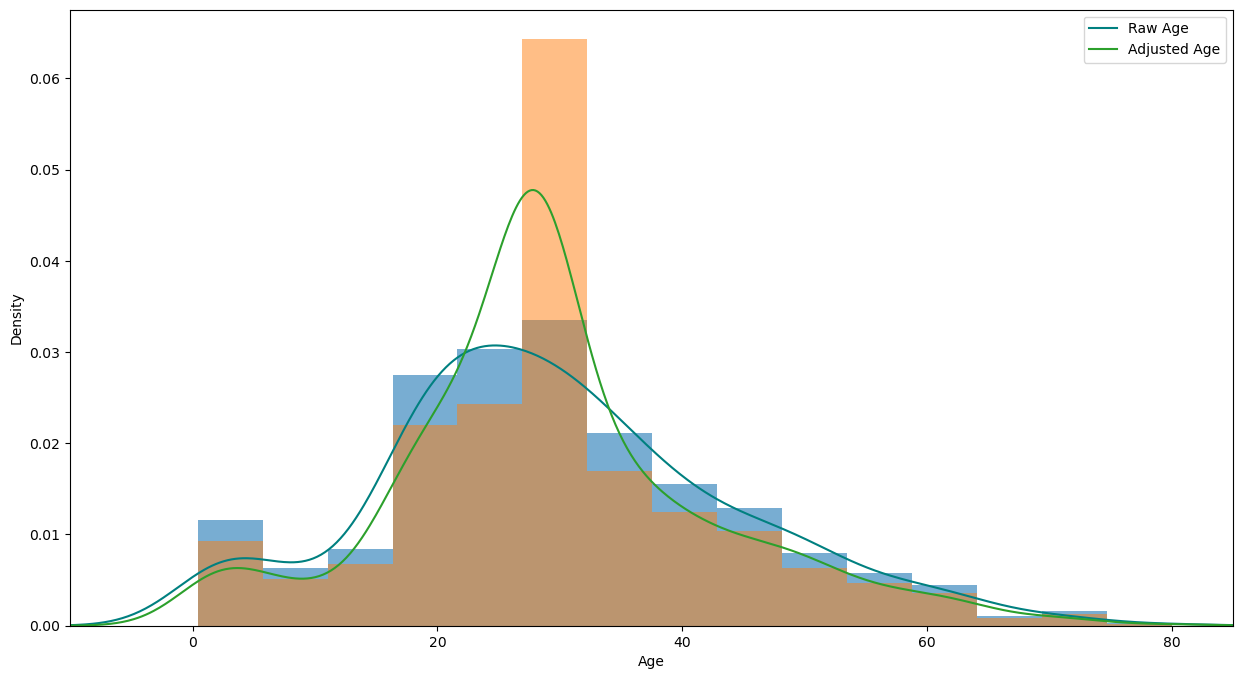

In [78]:
plt.figure(figsize = (15,8))

# Plotting the first histogram and density plot
ax = train_df['Age'].hist(bins=15, density=True, stacked=True, alpha=0.6)
train_df['Age'].plot(kind='density', color='teal')

# Plotting the second histogram and density plot
train_data['Age'].hist(bins=15, density=True, stacked=True, alpha=0.5, ax=ax)
train_data['Age'].plot(kind='density', ax=ax)

# Setting the legend
ax.legend(['Raw Age', 'Adjusted Age'])

# Setting other plot attributes
ax.set_xlabel('Age')
plt.xlim(-10, 85)
plt.show()

### Additional Variables

Since there are many variables are not helpful for our model, we need to drop them by creating categorical variables.

In [79]:
train_data['TravelAlone']=np.where((train_data['SibSp']+train_data['Parch'])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

training = pd.get_dummies(train_data, columns=['Pclass', 'Embarked', 'Sex'])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,False,False,True,False,False,True,True
1,1,38.0,71.2833,0,True,False,False,True,False,False,False
2,1,26.0,7.9250,1,False,False,True,False,False,True,False
3,1,35.0,53.1000,0,True,False,False,False,False,True,False
4,0,35.0,8.0500,1,False,False,True,False,False,True,True


# Apply same changes to testing data

In [80]:
# Check missing values in testing data
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [81]:
test_data = test_df.copy()
test_data['Age'].fillna(train_df['Age'].median(), inplace=True)
test_data['Fare'].fillna(train_df['Fare'].median(), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data['SibSp']+test_data['Parch'])>0, 0, 1)
test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=['Pclass', 'Embarked', 'Sex'])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,False,False,True,False,True,False,True
1,47.0,7.0000,0,False,False,True,False,False,True,False
2,62.0,9.6875,1,False,True,False,False,True,False,True
3,27.0,8.6625,1,False,False,True,False,False,True,True
4,22.0,12.2875,0,False,False,True,False,False,True,False


# Exploratory Data Analysis

### Age

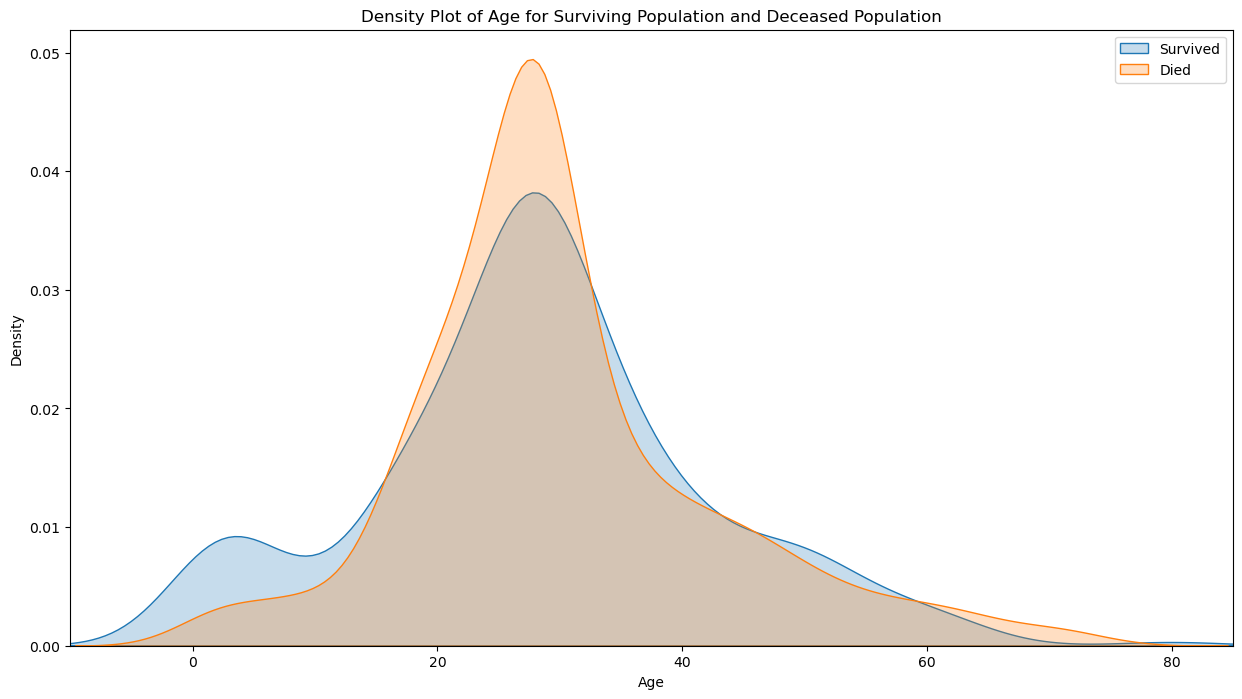

In [82]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train['Age'][final_train.Survived == 1], fill=True)
sns.kdeplot(final_train['Age'][final_train.Survived == 0], fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10, 85)
plt.show()

The age distribution for survivors and deceased is actually very similar.

One notable difference is a large propertion for survivors were children.

The passengers evidently made an attempt to save children by giving them a place on life rafts.

### Passenger Class

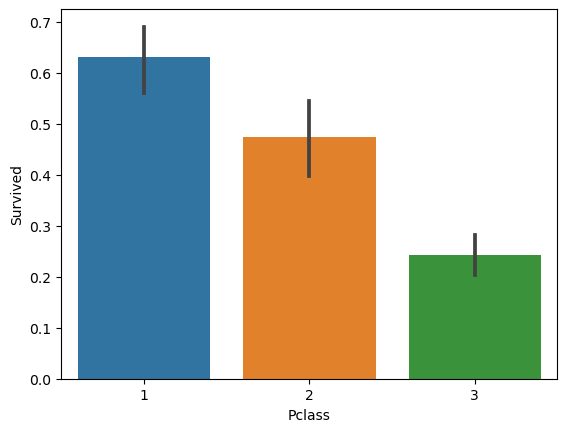

In [83]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.show()

First class passenger was saftest.

### Embarked Port

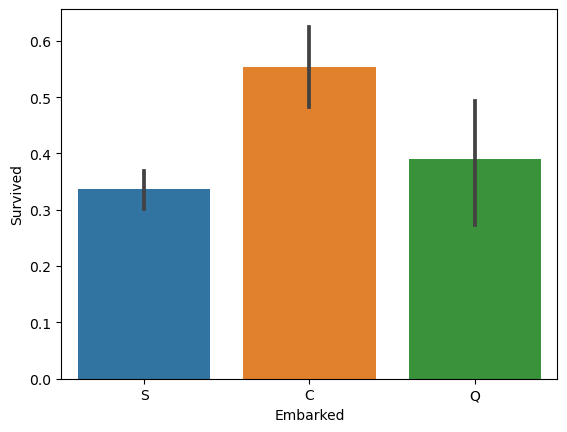

In [84]:
sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.show()

Passengers who boarded in C appear to the highestt survival rate.

Passengers who boarded in S appear to the Lowest survival rate.

This probably related to passenger class, or the order of room assignments.

### Traveling Alone

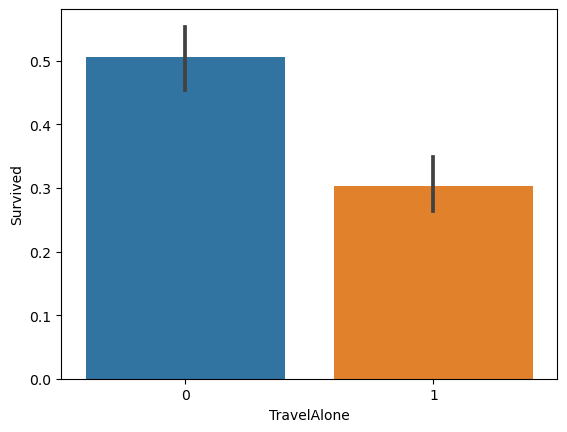

In [85]:
sns.barplot(x='TravelAlone', y='Survived', data=final_train)
plt.show()

Individuals traveling were more likely to die than others with family.

### Gender Variable

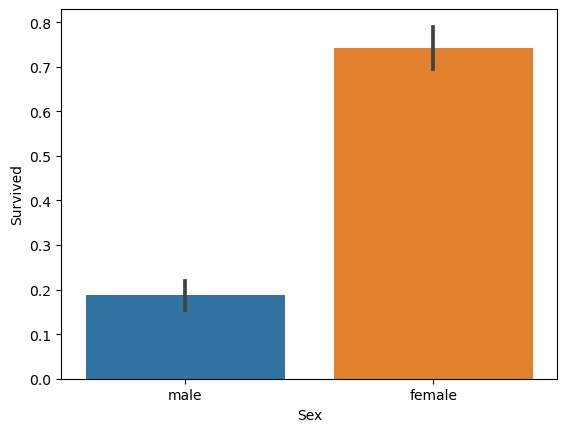

In [86]:
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.show()

Obvious difference between male and female.

# Logistic Regression and Result

### Feature selection

Recursive feature elimination Given an external estimator that assigns weights to features.


Recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.


First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute.


Then, the least important features are pruned from current set of features.


That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male']
X = final_train[cols]
Y = final_train['Survived']


model = LogisticRegression()
rfe = RFE(model, n_features_to_select=len(cols)) 
rfe = rfe.fit(X_scaled, Y)

print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male']


### Feature ranking

Optimal number of features: 7
Selected features: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_S', 'Sex_male']


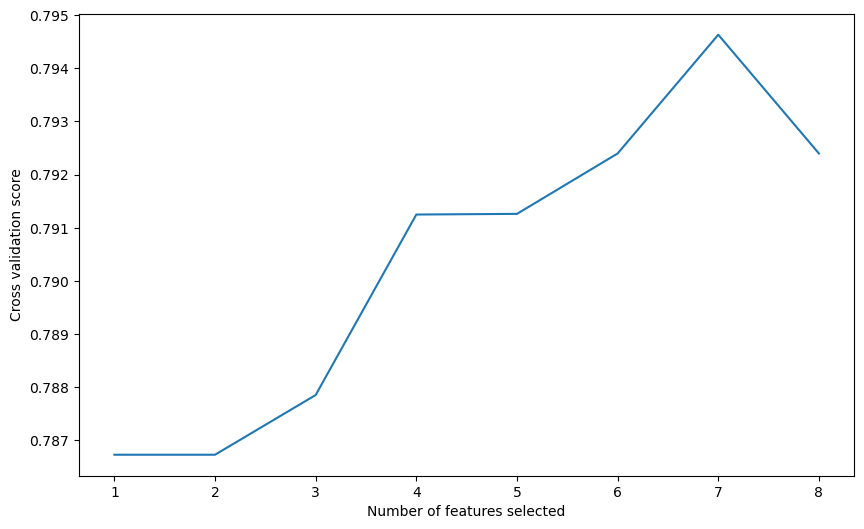

In [109]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=model, step=1, cv=10, scoring='accuracy')
rfecv.fit(X_scaled, Y)

print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected features: %s" % list(X.columns[rfecv.support_]))

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

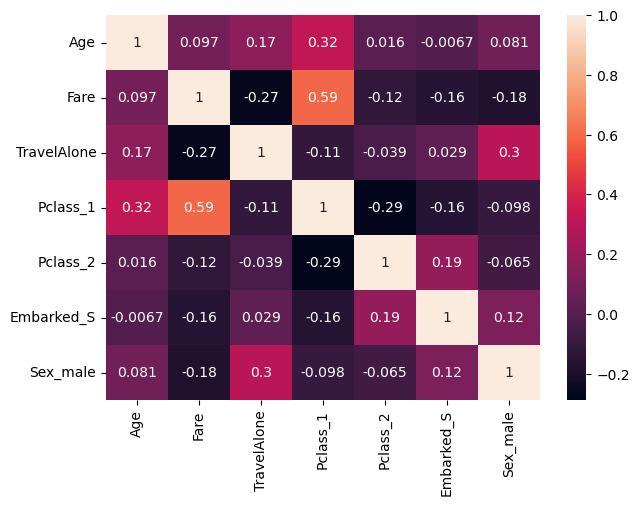

In [116]:
Selected_features = ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_S', 'Sex_male']
X = final_train[Selected_features]

plt.subplots(figsize=(7,5))
sns.heatmap(X.corr(), annot=True)
plt.show()

# Model Evaluation

Train/Test split results:
LogisticRegression accuracy is 0.782
LogisticRegression log_loss is 0.508
LogisticRegression AUC is 0.837


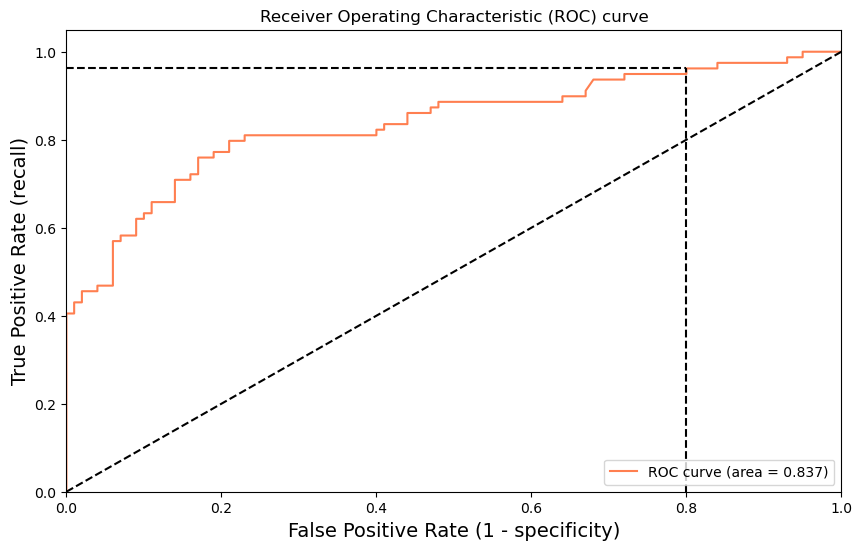

Using a threshold of 0.065 guarantees a sensitivity of 0.962 and specificity of 0.200, i.e., a false positive rate of 80.00%.


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc
from sklearn.preprocessing import StandardScaler

# Assuming 'final_train' is your DataFrame and 'Selected_features' is a list of feature names
X = final_train[Selected_features]
Y = final_train['Survived']

# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Logistic Regression model with increased iterations
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, Y_train)

# Predictions
Y_pred = logreg.predict(X_test_scaled)
Y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
fpr, tpr, thr = roc_curve(Y_test, Y_pred_proba)
print('Train/Test split results:')
print("LogisticRegression accuracy is %2.3f" % accuracy_score(Y_test, Y_pred))
print("LogisticRegression log_loss is %2.3f" % log_loss(Y_test, Y_pred_proba))
print("LogisticRegression AUC is %2.3f" % auc(fpr, tpr))

# Identify the index of the first threshold where the sensitivity > 0.95
idx = np.min(np.where(tpr > 0.95))

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--')  # Corrected
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--')  # Corrected
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# Print the threshold information
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +
      "and specificity of %.3f, " % (1 - fpr[idx]) +
      "i.e., a false positive rate of %.2f%%." % (fpr[idx] * 100))
